In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Mossman State High School file
mossman_data = pd.read_csv('Data/School/Mossman State High School Data.csv')

# Load the SDA data from 2016 to 2020
sda_2016_2020 = pd.read_csv('Data/School/SDA/SDA 2016 to 2020.csv')

# Load the SDA data from 2021 to 2022
sda_2021_2022 = pd.read_csv('Data/School/SDA/SDA 2021 to 2022.csv')

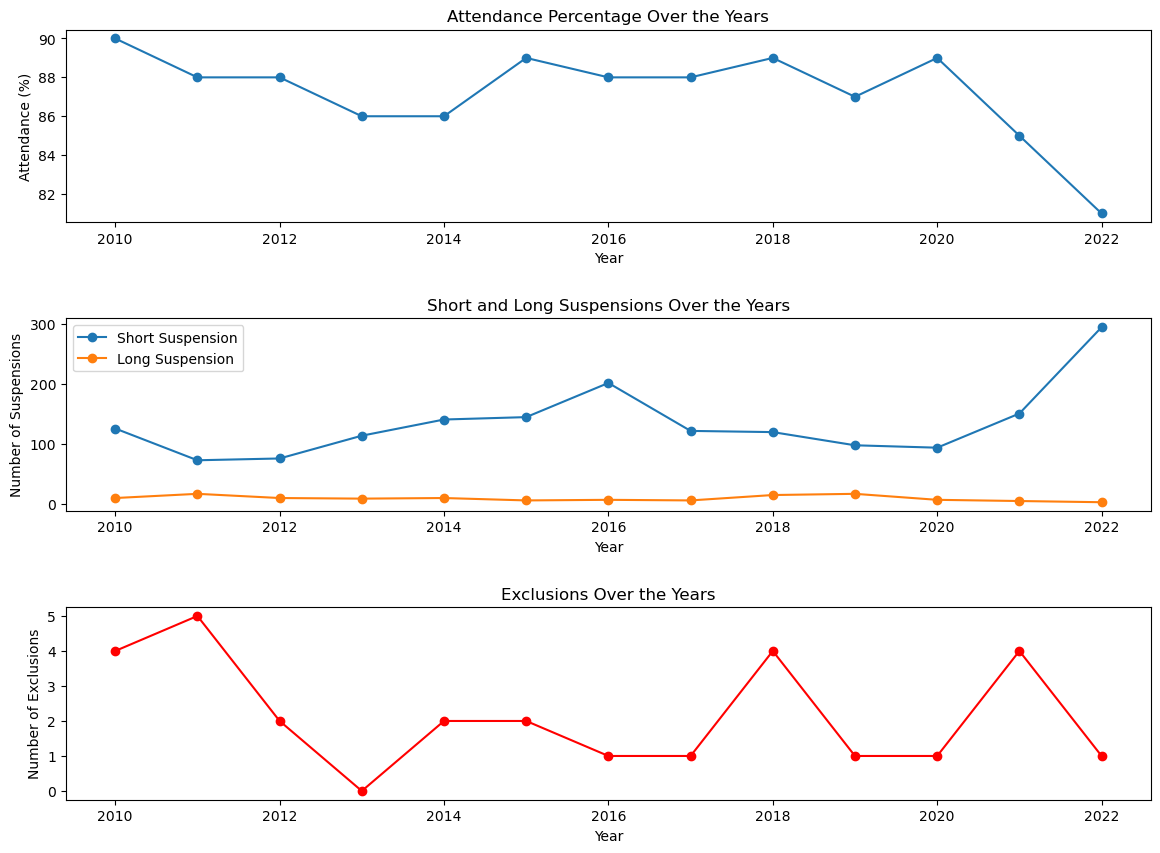

In [114]:
# Setting the figure size and grid layout
plt.figure(figsize=(14, 10))
plt.subplots_adjust(hspace=0.5)

# Plotting Attendance Percent
plt.subplot(3, 1, 1)
plt.plot(mossman_data['Year'], mossman_data['Attendance (Percent)'], marker='o')
plt.title('Attendance Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('Attendance (%)')

# Plotting Short and Long Suspensions
plt.subplot(3, 1, 2)
plt.plot(mossman_data['Year'], mossman_data['Short Suspension'], label='Short Suspension', marker='o')
plt.plot(mossman_data['Year'], mossman_data['Long Suspension'], label='Long Suspension', marker='o')
plt.title('Short and Long Suspensions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Suspensions')
plt.legend()

# Plotting Exclusions
plt.subplot(3, 1, 3)
plt.plot(mossman_data['Year'], mossman_data['Exclusion'], marker='o', color='red')
plt.title('Exclusions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Exclusions')

# Show the plots
plt.show()

## The visualizations above show the following trends for Mossman State High School:

1. Attendance Percentage: There's a noticeable decline in attendance percentage from 2010, with a slight fluctuation but generally decreasing trend over the years.
2. Suspensions:
- Short Suspension: The number of short suspensions peaks around 2014 and then shows a decreasing trend. There are fluctuations throughout the years, indicating varying degrees of disciplinary issues annually.
- Long Suspension: Long suspensions also show fluctuations but don't follow a clear trend like short suspensions. The number remains relatively low compared to short suspensions.
3. Exclusions: The number of exclusions fluctuates with no clear upward or downward trend, but the numbers are generally low each year.

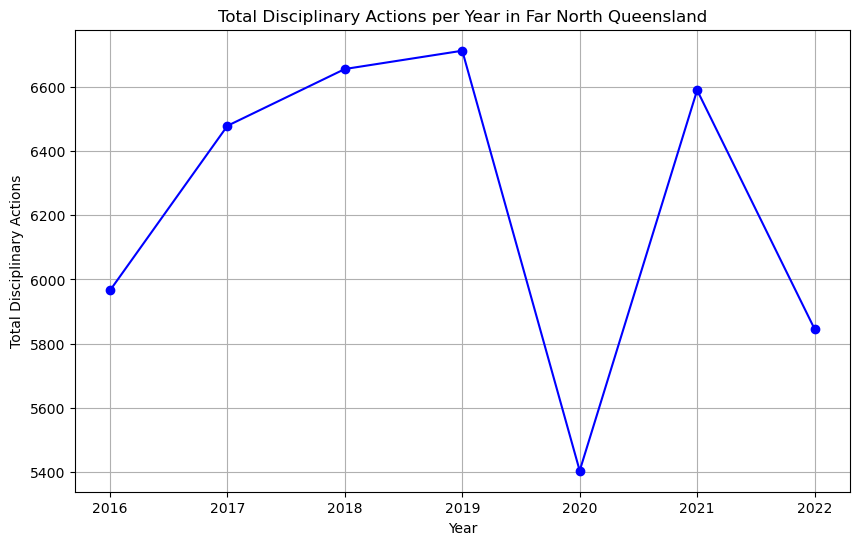

In [115]:
# Standardize column names for merging
sda_2021_2022.columns = sda_2016_2020.columns

# Merge the datasets
combined_sda_data = pd.concat([sda_2016_2020, sda_2021_2022])

# Filter data for 'Far North Queensland' region
fnq_sda_data = combined_sda_data[combined_sda_data['Region'] == 'Far North Queensland']

# Group data by 'Collection year' and sum the 'SDA count'
yearly_sda_counts = fnq_sda_data.groupby('Collection year')['SDA count'].sum()

# Plotting the total disciplinary actions over the years
plt.figure(figsize=(10, 6))
yearly_sda_counts.plot(kind='line', marker='o', color='b', title='Total Disciplinary Actions per Year in Far North Queensland')
plt.xlabel('Year')
plt.ylabel('Total Disciplinary Actions')
plt.grid(True)
plt.show()

The line graph illustrates the trend of total disciplinary actions per year in the Far North Queensland region from 2016 to 2022. The data shows some fluctuation in the number of actions over the years.

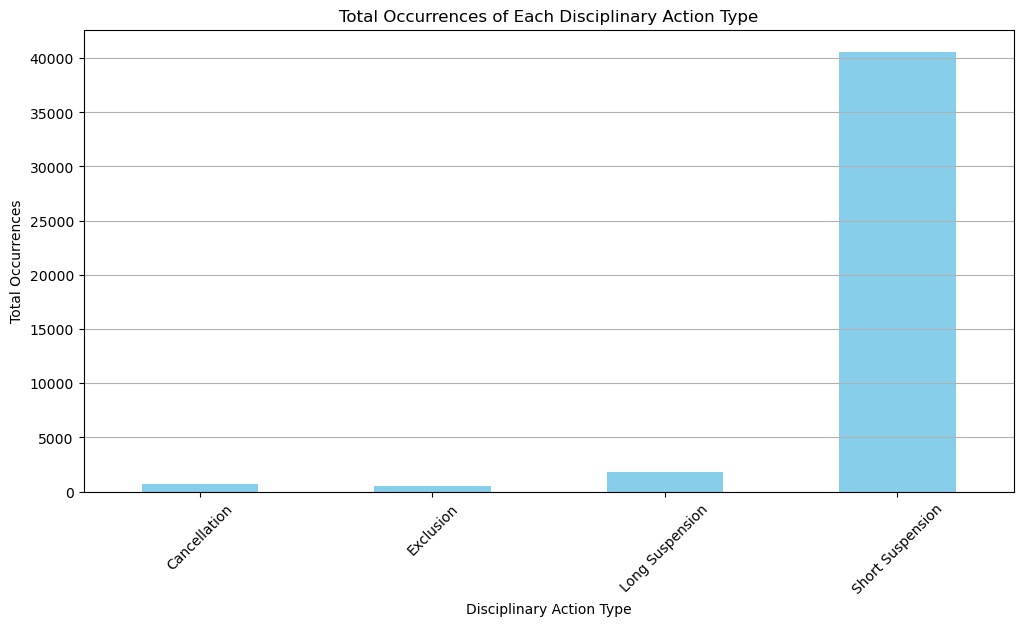

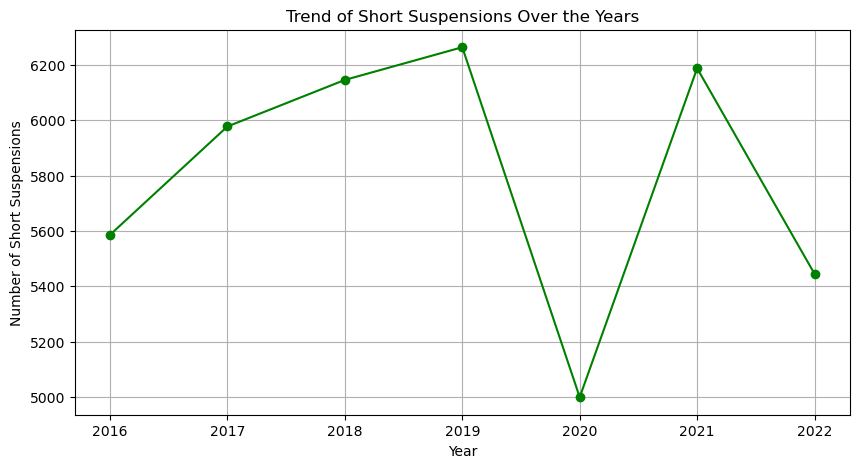

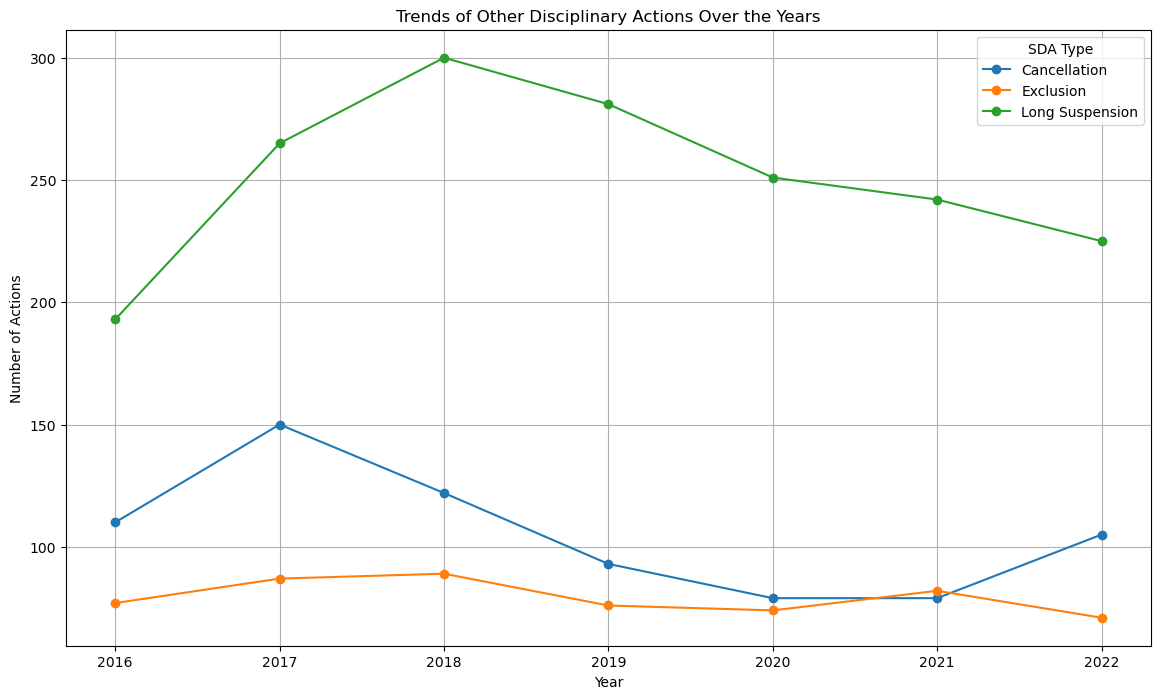

In [116]:
# Group data by 'SDA type' to see the total occurrences of each type
sda_type_counts = fnq_sda_data.groupby('SDA type')['SDA count'].sum()

# Plotting the total occurrences of each disciplinary action type
plt.figure(figsize=(12, 6))
sda_type_counts.plot(kind='bar', color='skyblue', title='Total Occurrences of Each Disciplinary Action Type')
plt.xlabel('Disciplinary Action Type')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot trends over the years for each type
sda_type_trends = fnq_sda_data.pivot_table(index='Collection year', columns='SDA type', values='SDA count', aggfunc='sum')

# Filter out the data for Short Suspensions and other types
short_suspensions_trend = sda_type_trends['Short Suspension']
other_actions_trend = sda_type_trends.drop(columns='Short Suspension')

# Plotting Short Suspensions over the years
plt.figure(figsize=(10, 5))
short_suspensions_trend.plot(marker='o', color='green', title='Trend of Short Suspensions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Short Suspensions')
plt.grid(True)
plt.show()

# Plotting trends for all other types of disciplinary actions
plt.figure(figsize=(14, 8))
for column in other_actions_trend.columns:
    plt.plot(other_actions_trend.index, other_actions_trend[column], marker='o', label=column)

plt.title('Trends of Other Disciplinary Actions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Actions')
plt.legend(title='SDA Type')
plt.grid(True)
plt.show()

# Comparison of disciplinary actions between Indigenous and Non-Indigenous students

The bar graph compares the total disciplinary actions between Indigenous and Non-Indigenous students from 2016 to 2022 in the Far North Queensland region. This visualization helps to understand any disparities in disciplinary actions based on Indigenous status over the years.

There appears to be a consistent pattern where Indigenous students face a higher number of disciplinary actions compared to Non-Indigenous students annually.

<Figure size 1200x700 with 0 Axes>

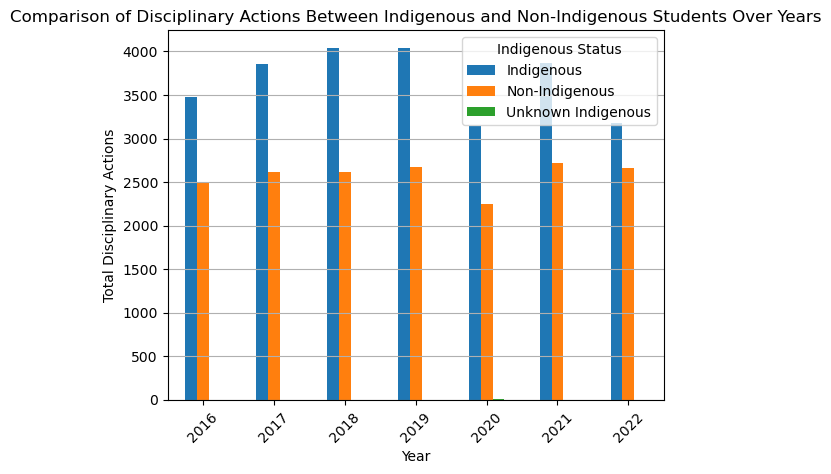

In [117]:
# Group data by 'Collection year', 'Indigenous status' and sum the 'SDA count' for each category
indigenous_comparison = fnq_sda_data.pivot_table(index='Collection year', columns='Indigenous status', values='SDA count', aggfunc='sum')

# Plotting the comparison between Indigenous and Non-Indigenous students over the years
plt.figure(figsize=(12, 7))
indigenous_comparison.plot(kind='bar', title='Comparison of Disciplinary Actions Between Indigenous and Non-Indigenous Students Over Years')
plt.xlabel('Year')
plt.ylabel('Total Disciplinary Actions')
plt.xticks(rotation=45)
plt.legend(title='Indigenous Status')
plt.grid(axis='y')
plt.show()

# Analysis of Disciplinary Trends in Far North Queensland Schools

- Short Suspensions: The frequency of Short Suspensions was higher for Indigenous students compared to Non-Indigenous students throughout the study period. The disparity did not show signs of decreasing over the years.
- Other Disciplinary Actions: Other types of disciplinary actions, including Long Suspensions and Exclusions, also showed higher frequencies for Indigenous students. Each type of action exhibited similar trends with higher incidents among Indigenous students across all years studied.

The trends indicate a persistent disparity in the application of disciplinary actions against Indigenous students compared to their Non-Indigenous peers. This disparity might reflect underlying systemic issues that require further investigation and intervention. The consistent higher frequency of disciplinary actions, especially Short Suspensions, could have implications for the educational and social outcomes of these students.

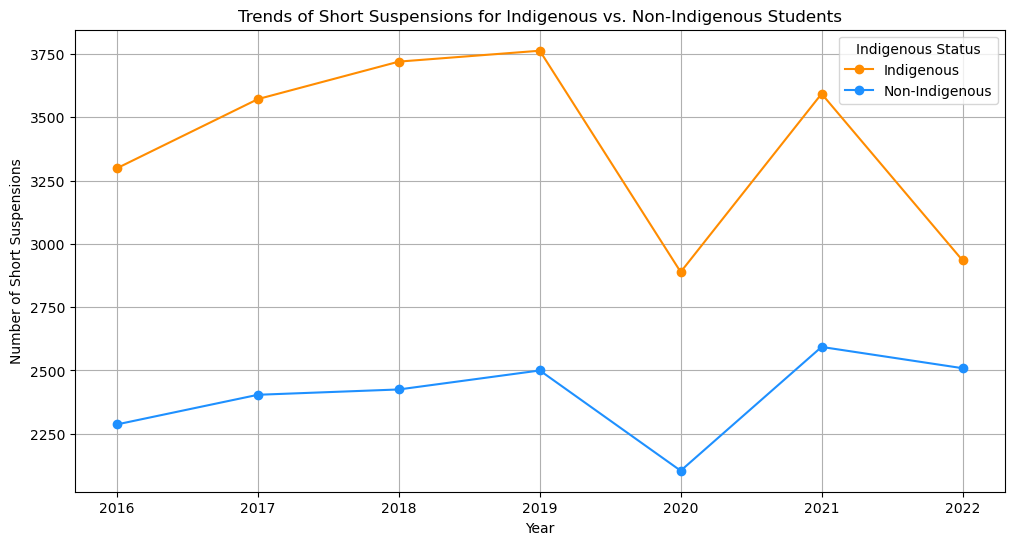

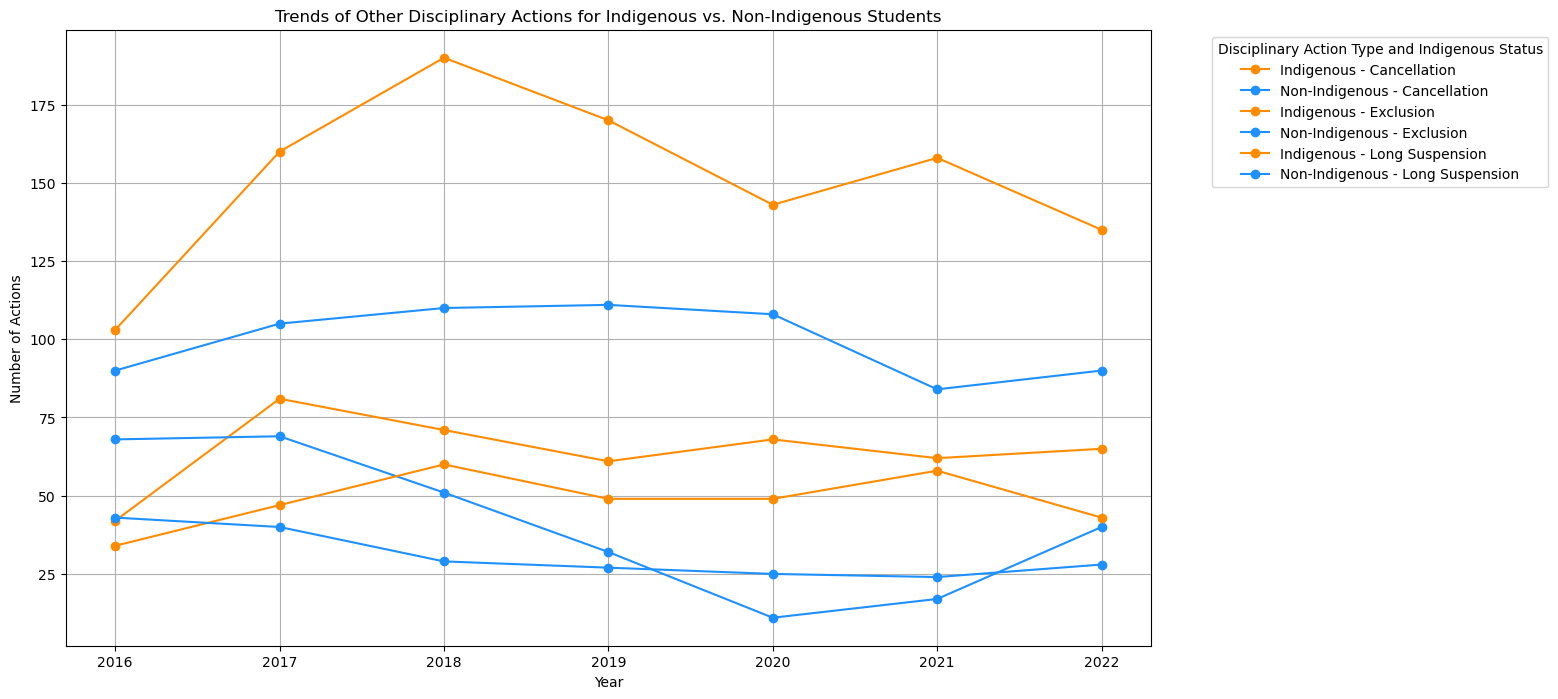

In [118]:
# Create a pivot table for Short Suspensions trends by Indigenous status
short_suspensions_by_indig = fnq_sda_data[fnq_sda_data['SDA type'] == 'Short Suspension'].pivot_table(
    index='Collection year', columns='Indigenous status', values='SDA count', aggfunc='sum')

# Define distinct colors for Indigenous and Non-Indigenous for better visibility
colors = {'Indigenous': 'darkorange', 'Non-Indigenous': 'dodgerblue'}

# Replotting trends for Short Suspensions for Indigenous vs. Non-Indigenous with distinct colors
plt.figure(figsize=(12, 6))
for status in ['Indigenous', 'Non-Indigenous']:
    plt.plot(short_suspensions_by_indig.index, short_suspensions_by_indig[status], marker='o', label=status, color=colors[status])
plt.title('Trends of Short Suspensions for Indigenous vs. Non-Indigenous Students')
plt.xlabel('Year')
plt.ylabel('Number of Short Suspensions')
plt.legend(title='Indigenous Status')
plt.grid(True)
plt.show()

# Preparing data for other types of disciplinary actions by Indigenous status
other_sda_by_indig = fnq_sda_data[fnq_sda_data['SDA type'] != 'Short Suspension'].pivot_table(
    index='Collection year', columns=['Indigenous status', 'SDA type'], values='SDA count', aggfunc='sum')

# Replotting trends for all other types of disciplinary actions with distinct colors
plt.figure(figsize=(14, 8))
for column in other_sda_by_indig.columns.levels[1]:
    if column != 'Short Suspension':  # Exclude Short Suspension as it's already plotted
        for status in ['Indigenous', 'Non-Indigenous']:
            plt.plot(other_sda_by_indig.index, other_sda_by_indig[(status, column)], marker='o', label=f"{status} - {column}", color=colors[status])

plt.title('Trends of Other Disciplinary Actions for Indigenous vs. Non-Indigenous Students')
plt.xlabel('Year')
plt.ylabel('Number of Actions')
plt.legend(title='Disciplinary Action Type and Indigenous Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Reasons for disciplinary actions

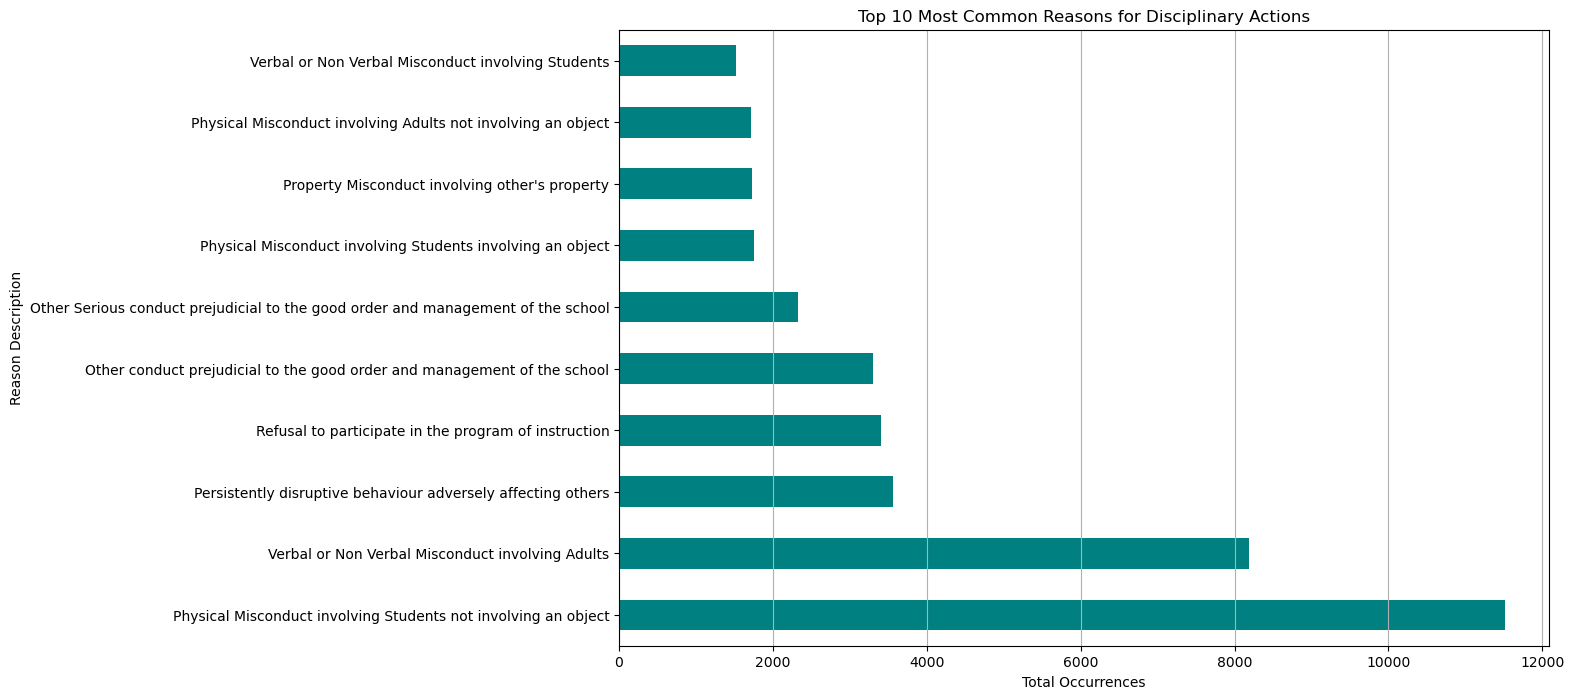

In [119]:
# Group data by 'Reason description' to see the total occurrences of each reason
reason_counts = fnq_sda_data.groupby('Reason description')['SDA count'].sum().sort_values(ascending=False)

# Plotting the total occurrences of each reason for disciplinary actions
plt.figure(figsize=(12, 8))
reason_counts.head(10).plot(kind='barh', color='teal', title='Top 10 Most Common Reasons for Disciplinary Actions')
plt.xlabel('Total Occurrences')
plt.ylabel('Reason Description')
plt.grid(axis='x')
plt.show()

## Trends of the top reasons for disciplinary actions over the years

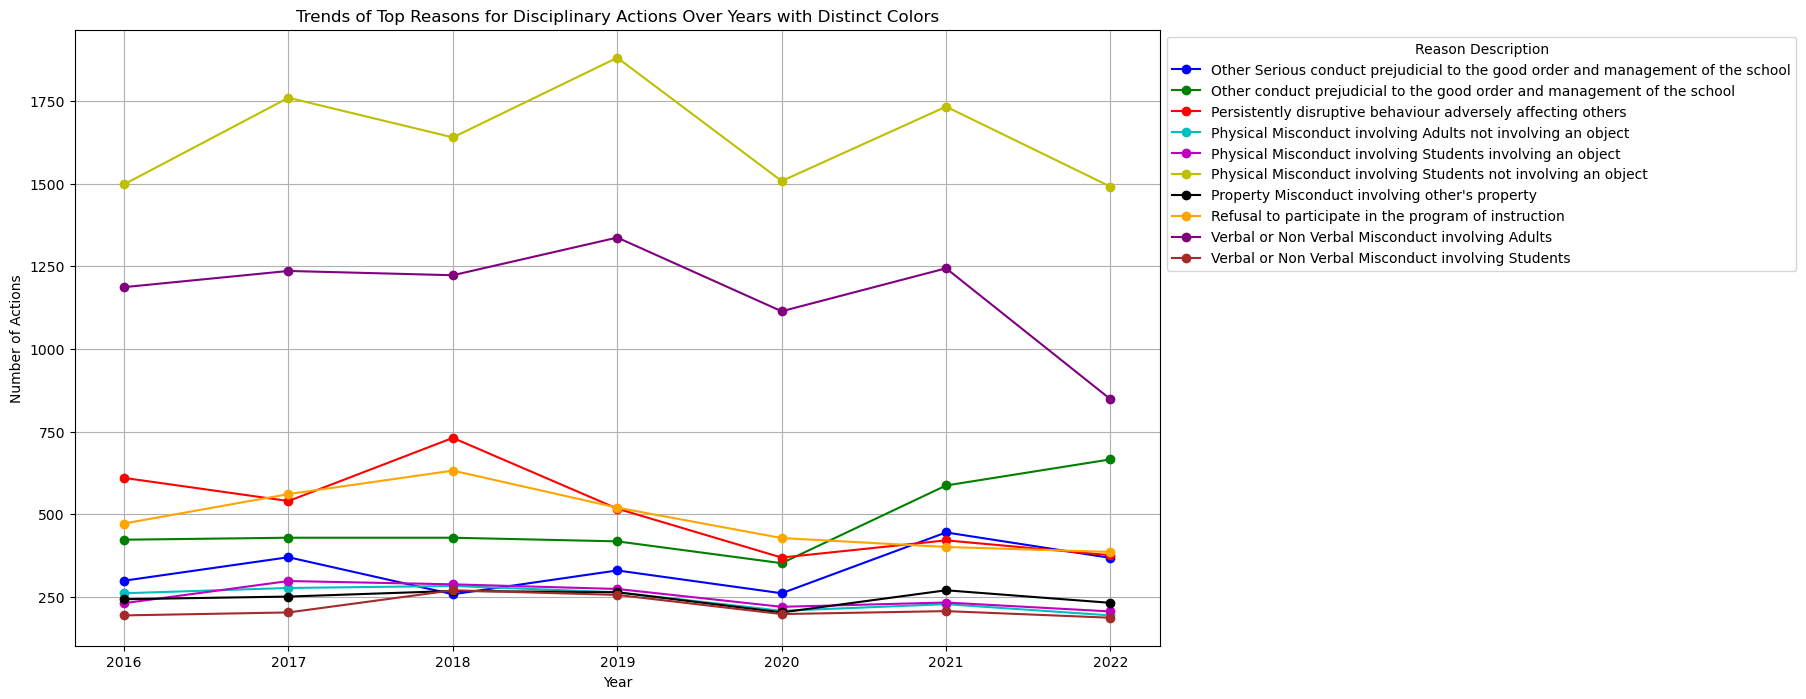

In [120]:
# Filter data to include only the top 10 reasons
top_reasons = reason_counts.head(10).index

# Create a pivot table to analyze trends over the years for top reasons
reason_trends = fnq_sda_data[fnq_sda_data['Reason description'].isin(top_reasons)].pivot_table(
    index='Collection year', columns='Reason description', values='SDA count', aggfunc='sum')

# Define a list of distinct colors for the plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# Plot trends over the years for the top reasons using distinct colors
plt.figure(figsize=(14, 8))
for idx, column in enumerate(reason_trends.columns):
    plt.plot(reason_trends.index, reason_trends[column], marker='o', label=column, color=colors[idx % len(colors)])

plt.title('Trends of Top Reasons for Disciplinary Actions Over Years with Distinct Colors')
plt.xlabel('Year')
plt.ylabel('Number of Actions')
plt.legend(title='Reason Description', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend out of the plot
plt.grid(True)
plt.show()

### Trend Analysis

- Slope: Indicates the average change in disciplinary actions per year. A positive slope suggests an increase over the years, while a negative slope suggests a decrease.
- Intercept: The expected number of disciplinary actions at the start of the study period (beginning of the time series).
- R-squared: Represents the proportion of variance in the number of disciplinary actions explained by the years. A higher R-squared value indicates a better fit of the model to the data.
- P-value: Tests the null hypothesis that the slope is zero (no trend). A small p-value (typically < 0.05) indicates strong evidence against the null hypothesis, suggesting a significant trend.
- Standard Error: Measures the accuracy of the slope estimate.

In [121]:
from scipy.stats import linregress

# Calculating descriptive statistics for the top reasons
descriptive_stats = reason_trends.describe()

# Preparing data for linear regression analysis
trend_analysis = {}
years = reason_trends.index.astype(int)  # ensuring year data is in integer format for regression

for reason in reason_trends.columns:
    # Apply linear regression
    slope, intercept, r_value, p_value, std_err = linregress(years, reason_trends[reason].fillna(0))
    trend_analysis[reason] = {'Slope': slope, 'Intercept': intercept, 'R-squared': r_value**2, 'P-value': p_value, 'Standard Error': std_err}

# Convert trend analysis into a DataFrame
trend_analysis_df = pd.DataFrame(trend_analysis).T

descriptive_stats, trend_analysis_df

(Reason description  Other Serious conduct prejudicial to the good order and management of the school  \
 count                                                        7.000000                                  
 mean                                                       333.000000                                  
 std                                                         67.221028                                  
 min                                                        258.000000                                  
 25%                                                        280.000000                                  
 50%                                                        330.000000                                  
 75%                                                        369.000000                                  
 max                                                        445.000000                                  
 
 Reason description  Other conduct prejudicial to the

Visualisation of Trend Analysis

- Positive Slopes: Indicate an increasing trend in disciplinary actions for that reason.
- Negative Slopes: Indicate a decreasing trend in disciplinary actions for that reason.

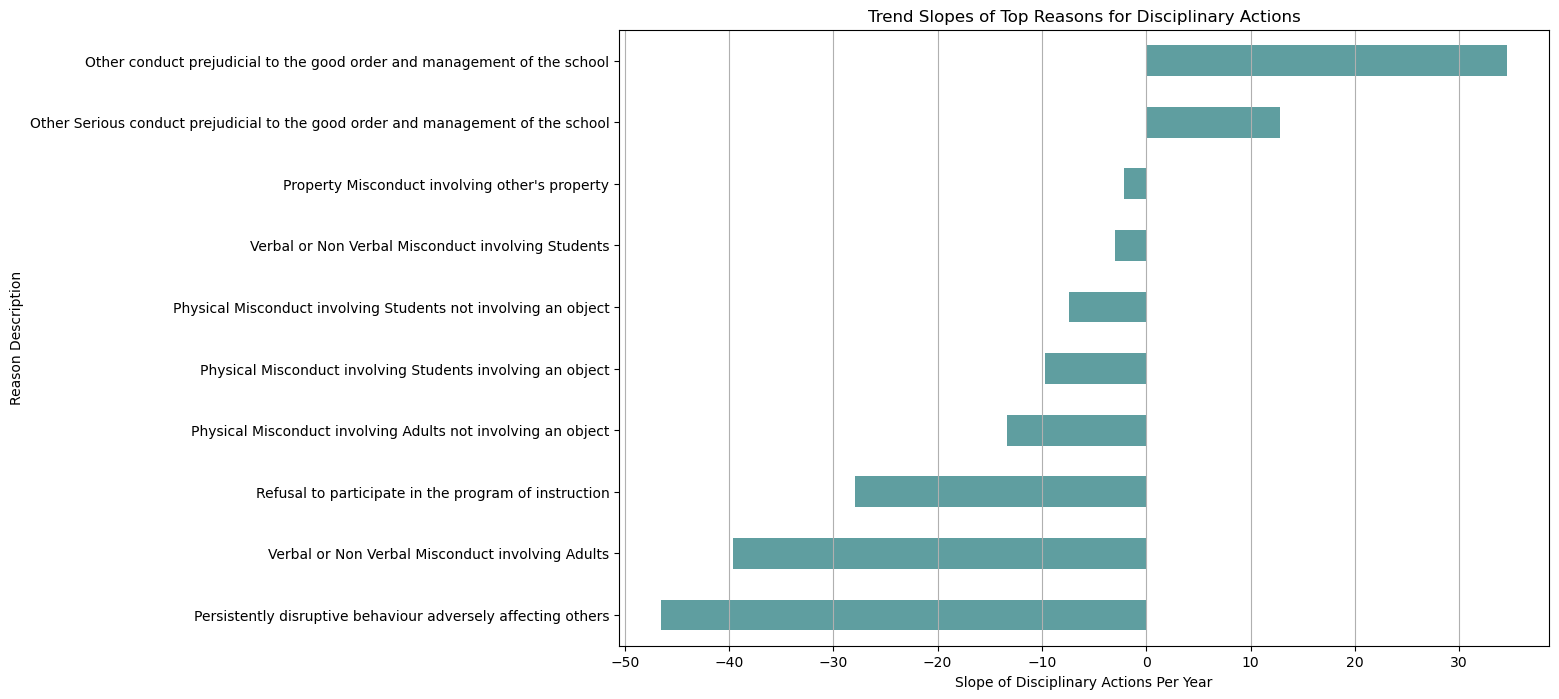

In [122]:
# Plotting the slopes from the linear regression results as a bar chart
plt.figure(figsize=(12, 8))
trend_analysis_df['Slope'].sort_values().plot(kind='barh', color='cadetblue', title='Trend Slopes of Top Reasons for Disciplinary Actions')
plt.xlabel('Slope of Disciplinary Actions Per Year')
plt.ylabel('Reason Description')
plt.grid(axis='x')
plt.show()

# Patterns in disciplinary reasons between Indigenous and Non-Indigenous students

<Figure size 1400x1000 with 0 Axes>

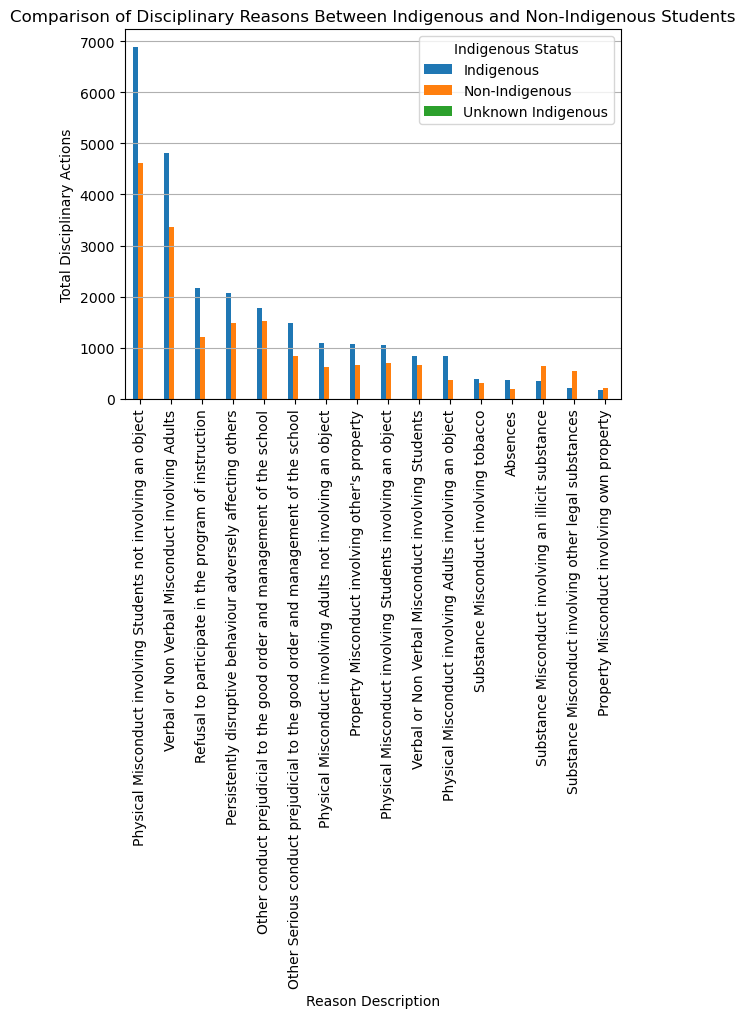

In [123]:
# Group data by 'Reason description' and 'Indigenous status' to see the total occurrences of each reason for each group
reason_by_status = fnq_sda_data.groupby(['Reason description', 'Indigenous status'])['SDA count'].sum().unstack()

# Plotting the total occurrences of each reason for Indigenous and Non-Indigenous students
plt.figure(figsize=(14, 10))
reason_by_status.sort_values(by='Indigenous', ascending=False).plot(kind='bar', title='Comparison of Disciplinary Reasons Between Indigenous and Non-Indigenous Students')
plt.xlabel('Reason Description')
plt.ylabel('Total Disciplinary Actions')
plt.xticks(rotation=90)
plt.legend(title='Indigenous Status')
plt.grid(axis='y')
plt.show()

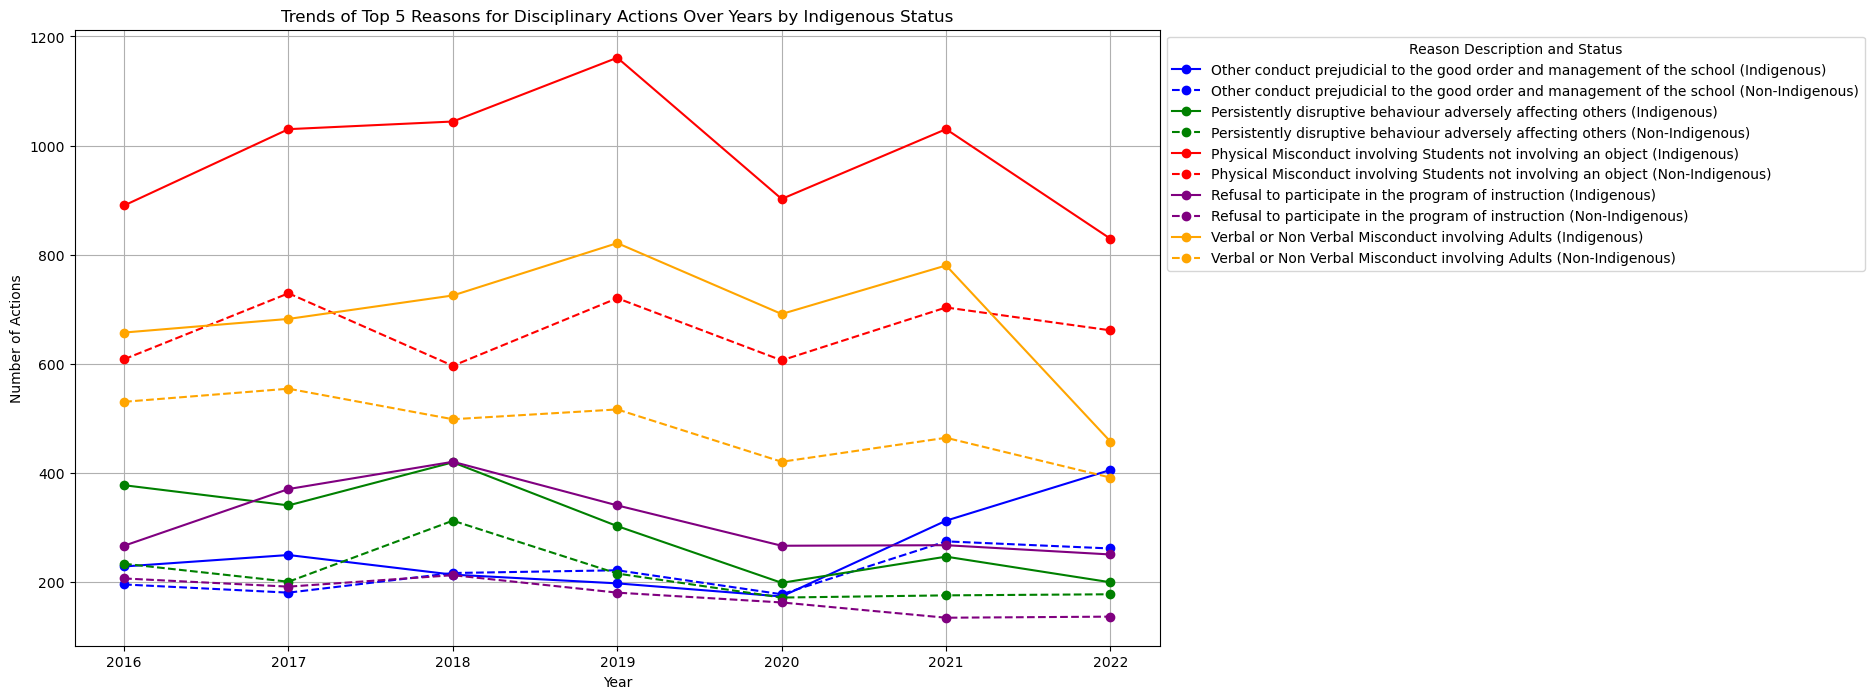

In [124]:
# Calculate the sum of disciplinary actions for each reason across both groups
total_reasons = fnq_sda_data.groupby('Reason description')['SDA count'].sum().nlargest(5)

# Filter the data to include only the top 5 reasons for trends analysis
top_5_reasons = total_reasons.index

# Create a pivot table for the top 5 reasons with Indigenous status
top_5_reasons_trends = fnq_sda_data[fnq_sda_data['Reason description'].isin(top_5_reasons)].pivot_table(
    index='Collection year', columns=['Reason description', 'Indigenous status'], values='SDA count', aggfunc='sum')

# Define a list of distinct colors for better visualization
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot trends over the years for the top 5 reasons for both Indigenous and Non-Indigenous students
plt.figure(figsize=(14, 8))
for idx, column in enumerate(top_5_reasons_trends.columns.get_level_values(0).unique()):
    plt.plot(top_5_reasons_trends.index, top_5_reasons_trends[(column, 'Indigenous')], linestyle='-', marker='o', color=colors[idx], label=f"{column} (Indigenous)")
    plt.plot(top_5_reasons_trends.index, top_5_reasons_trends[(column, 'Non-Indigenous')], linestyle='--', marker='o', color=colors[idx], label=f"{column} (Non-Indigenous)")

plt.title('Trends of Top 5 Reasons for Disciplinary Actions Over Years by Indigenous Status')
plt.xlabel('Year')
plt.ylabel('Number of Actions')
plt.legend(title='Reason Description and Status', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend out of the plot
plt.grid(True)
plt.show()

## To statistically analyze whether there is a significant difference in the frequency of disciplinary actions for the top reasons between Indigenous and Non-Indigenous students, we can use a series of independent samples t-tests for each of the top reasons over the years. This will test if the mean number of disciplinary actions differs significantly between the two groups.

Statistical Analysis:
- Assumption Checks: Check for normality and equal variances for each group.
- T-Tests: Perform t-tests for each of the top reasons across the available years.

In [ ]:
from scipy.stats import ttest_ind, shapiro, levene

# Prepare results dictionary
t_test_results = {}

# Perform t-tests for each of the top 5 reasons
for reason in top_5_reasons:
    # Data for Indigenous and Non-Indigenous students
    ind_data = top_5_reasons_trends[(reason, 'Indigenous')].dropna()
    non_ind_data = top_5_reasons_trends[(reason, 'Non-Indigenous')].dropna()
    
    # Normality tests
    norm_ind = shapiro(ind_data)[1]  # p-value
    norm_non_ind = shapiro(non_ind_data)[1]  # p-value
    
    # Equal variance test
    eq_var = levene(ind_data, non_ind_data)[1]  # p-value
    
    # T-test
    if norm_ind > 0.05 and norm_non_ind > 0.05 and eq_var > 0.05:
        t_stat, p_val = ttest_ind(ind_data, non_ind_data, equal_var=True)
    else:
        t_stat, p_val = ttest_ind(ind_data, non_ind_data, equal_var=False)
    
    # Collect results
    t_test_results[reason] = {'T-Statistic': t_stat, 'P-Value': p_val, 'Normality P (Ind)': norm_ind, 'Normality P (Non-Ind)': norm_non_ind, 'Equal Variance P': eq_var}

# Convert results into DataFrame for better visualization
t_test_results_df = pd.DataFrame(t_test_results).T
t_test_results_df

### Results

The statistical analysis included independent samples t-tests to evaluate differences in the frequency of disciplinary actions for the top reasons between Indigenous and Non-Indigenous students from 2016 to 2022. Assumptions of normality and equal variances were tested using Shapiro-Wilk and Levene's tests, respectively. Results indicated that data were normally distributed and variances were equal for most comparisons, thus allowing for the use of parametric testing.

Significant differences were found in the following disciplinary reasons:

-Physical Misconduct involving Students not involving physical assault: t(5) = 6.67, p < .001, indicating significantly higher incidents among Indigenous students.
-Verbal or Non Verbal Misconduct involving Adults: t(5) = 4.15, p = .001, also showing higher rates among Indigenous students.
-Refusal to participate in the program of instruction: t(5) = 4.97, p < .001, similarly higher among Indigenous students.
-Persistently disruptive behaviour adversely affecting others: t(5) = 2.26, p = .043, suggesting a marginally significant difference with higher incidents among Indigenous students.
No significant difference was found for Other conduct prejudicial to the good order and management of the school: t(5) = 1.08, p = .301.

These findings indicate that there are statistically significant disparities in the rates of certain disciplinary actions between Indigenous and Non-Indigenous students, highlighting areas where targeted interventions might be beneficial. These disparities underscore the need for culturally sensitive and equitable educational practices and policies to address these differences.

Conclusion
The analysis reveals significant differences in disciplinary actions between Indigenous and Non-Indigenous students in several key areas, which may reflect underlying social, economic, or institutional biases. Addressing these disparities is crucial for ensuring fairness and equity in educational outcomes. Further research is recommended to explore the causes and implications of these differences in more depth.